In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import random
import time

In [2]:
def chi2(a,b,c,d):
    if a+b == 0:
        return (c-d)**2/(c+d)
    elif c+d == 0:
        return (a-b)**2/(a+b)
    else:
        return ((a-b)**2)/(a+b) + ((c-d)**2)/(c+d)

In [3]:
def LS(a,b,c,d): #local sensitivity
    stat = chi2(a,b,c,d); t = np.zeros(0)
    M = chi2(a,b,c,d); m = chi2(a,b,c,d)
    if a >= 2:
        t = [chi2(a-2,b+2,c,d), chi2(a-2,b+1,c+1,d), chi2(a-2,b+1,c,d+1), chi2(a-2,b,c+2,d), chi2(a-2,b,c+1,d+1),
             chi2(a-2,b,c,d+2)]
        M = max([max(t),M])
        m = min([min(t),m])
    if b >= 2:
        t = [chi2(a+2,b-2,c,d), chi2(a+1,b-2,c+1,d), chi2(a+1,b-2,c,d+1), chi2(a,b-2,c+2,d), chi2(a,b-2,c+1,d+1),
             chi2(a,b-2,c,d+2)]
        M = max([max(t),M])
        m = min([min(t),m])
    if c >= 2:
        t = [chi2(a+2,b,c-2,d), chi2(a+1,b+1,c-2,d), chi2(a+1,b,c-2,d+1), chi2(a,b+2,c-2,d), chi2(a,b+1,c-2,d+1),
             chi2(a,b,c-2,d+2)]
        M = max([max(t),M])
        m = min([min(t),m])
    if d >= 2:
        t = [chi2(a+2,b,c,d-2), chi2(a+1,b+1,c,d-2), chi2(a+1,b,c+1,d-2), chi2(a,b+2,c,d-2), chi2(a,b+1,c+1,d-2),
             chi2(a,b,c+2,d-2)]
        M = max([max(t),M])
        m = min([min(t),m])
    if a >= 1 and b >= 1:
        t = [chi2(a-1,b-1,c+2,d), chi2(a-1,b-1,c+1,d+1), chi2(a-1,b-1,c,d+2)]
        M = max([max(t),M])
        m = min([min(t),m])
    if a >= 1 and c >= 1:
        t = [chi2(a-1,b+2,c-1,d), chi2(a-1,b+1,c-1,d+1), chi2(a-1,b,c-1,d+2)]
        M = max([max(t),M])
        m = min([min(t),m])
    if a >= 1 and d >= 1:
        t = [chi2(a-1,b+2,c,d-1), chi2(a-1,b+1,c+1,d-1), chi2(a-1,b,c+2,d-1)]
        M = max([max(t),M])
        m = min([min(t),m])
    if b >= 1 and c >= 1:
        t = [chi2(a+2,b-1,c-1,d), chi2(a+1,b-1,c-1,d+1), chi2(a,b-1,c-1,d+2)]
        M = max([max(t),M])
        m = min([min(t),m])
    if b >= 1 and d >= 1:
        t = [chi2(a+2,b-1,c,d-1), chi2(a+1,b-1,c+1,d-1), chi2(a,b-1,c+2,d-1)]
        M = max([max(t),M])
        m = min([min(t),m])
    if c >= 1 and d >= 1:
        t = [chi2(a+2,b,c-1,d-1), chi2(a+1,b+1,c-1,d-1), chi2(a,b+2,c-1,d-1)]
        M = max([max(t),M])
        m = min([min(t),m])
    if a >= 1:
        t = [chi2(a-1,b+1,c,d), chi2(a-1,b,c+1,d), chi2(a-1,b,c,d+1)]
        M = max([max(t),M])
        m = min([min(t),m])
    if b >= 1:
        t = [chi2(a+1,b-1,c,d), chi2(a,b-1,c+1,d), chi2(a,b-1,c,d+1)]
        M = max([max(t),M])
        m = min([min(t),m])
    if c >= 1:
        t = [chi2(a+1,b,c-1,d), chi2(a,b+1,c-1,d), chi2(a,b,c-1,d+1)]
        M = max([max(t),M])
        m = min([min(t),m])
    if d >= 1:
        t = [chi2(a+1,b,c,d-1), chi2(a,b+1,c,d-1), chi2(a,b,c+1,d-1)]
        M = max([max(t),M])
        m = min([min(t),m])
    
    return max([M-stat, stat-m])

In [4]:
def SS(table,beta): #smooth sensitivity
    a = table[0]; b = table[1]; c = table[2]; d = table[3]
    GS = 8; ls = LS(a,b,c,d)
    if beta >= math.log(3):
        return ls
    else:
        dist = math.ceil(math.log(GS/ls))/beta
        t = int(2*dist); ss = 0
        for ya in range(-t,t+1):
            for yb in range(-t,t+1):
                for yc in range(-t,t+1):
                    yd = -ya-yb-yc
                    if a+ya >= 0 and b+yb>=0 and c+yc>=0 and d+yd>=0:
                        dxy = math.ceil((math.fabs(ya) + math.fabs(yb) + math.fabs(yc) + math.fabs(yd))/4)
                        if dxy <= dist:
                            ss = max([LS(a+ya,b+yb,c+yc,d+yd)*math.exp(-(beta*dxy)), ss])
        return ss

In [5]:
def SS_DPstats(table,epsilon): #use the standard Cauchy distribution
    a = table[0]; b = table[1]; c = table[2]; d = table[3]
    f = chi2(a,b,c,d); beta = epsilon/4
    ss = SS(table,beta)
    d1 = np.random.standard_cauchy(1); d2 = np.random.standard_cauchy(1)
    if math.fabs(d1) <= math.fabs(d2):
        A = f + ((4*ss)/epsilon)*d1
    else:
        A = f + ((4*ss)/epsilon)*d2
    return A

In [6]:
def GS_DPstats(table,epsilon):
    a = table[0]; b = table[1]; c = table[2]; d = table[3]
    f = chi2(a,b,c,d)
    A = f + np.random.laplace(loc = 0.0, scale = 8/epsilon, size=1)
    return A

In [7]:
def generateData(n):
    t = int(2*n); table = np.zeros(4)
    table[0] = np.random.binomial(t,1/4)
    table[1] = np.random.binomial(t-table[0],1/3)
    table[2] = np.random.binomial(t-table[0]-table[1],1/2)
    table[3] = t-table[0]-table[1]-table[2]
    return table

In [8]:
def Diff(n,m,epsilon):
    diff = np.zeros((2,m)); stats = np.zeros((m,2))
    ss_stats = np.zeros(m); gs_stats = np.zeros(m)
    
    for i in range(m):
        table = generateData(n)
        a = table[0]; b = table[1]; c = table[2]; d = table[3]
        stats[i][0] = chi2(a,b,c,d)
        stats[i][1] = i
        ss_stats[i] = SS_DPstats(table,epsilon)
        gs_stats[i] = GS_DPstats(table,epsilon)
        
        
    sstats = sorted(stats, key=lambda x:(x[0]),reverse=True)
    s = np.zeros(m); ss = np.zeros(m); gs = np.zeros(m)
    for i in range(m):
        s[i] = sstats[i][0]
        
        ss[i] = ss_stats[int(sstats[i][1])]
        diff[0][i] = math.fabs(s[i]-ss[i])
        
        gs[i] = gs_stats[int(sstats[i][1])]
        diff[1][i] = math.fabs(s[i]-gs[i])
        
    return diff

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


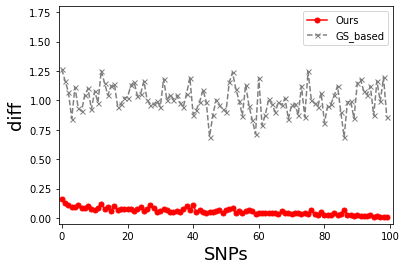

In [9]:
n = 5000; m = 100; epsilon = 8

sum_diff = np.zeros((2,m))

for j in range(50):
    diff = Diff(n,m,epsilon)
    for k in range(m):
        sum_diff[:,k] += diff[:,k]
diff = sum_diff / 50

index = np.zeros(m)
for i in range(m):
    index[i] = i

fig = plt.figure()
plt.ylim(-0.05, 1.80)
plt.xlim(-1, 101)
plt.plot(index, diff[0], marker="o", markersize=5, color = "r", linestyle = "-", label = "Ours")
plt.plot(index, diff[1], marker="x", markersize=5, color = "gray", linestyle = "--", label = "GS_based")
plt.legend()
plt.xlabel("SNPs", fontsize = 18)
plt.ylabel("diff", fontsize = 18)
fig.savefig("diff_22_N=5000_epsilon=8.png")
fig.savefig("figs/diff_22_N=5000_epsilon=8.eps", bbox_inches="tight", pad_inches=0.05)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


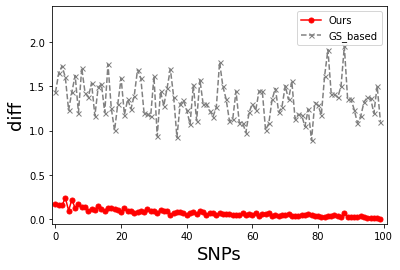

In [10]:
n = 5000; m = 100; epsilon = 6

sum_diff = np.zeros((2,m))

for j in range(50):
    diff = Diff(n,m,epsilon)
    for k in range(m):
        sum_diff[:,k] += diff[:,k]
diff = sum_diff / 50

index = np.zeros(m)
for i in range(m):
    index[i] = i

fig = plt.figure()
plt.ylim(-0.05, 2.40)
plt.xlim(-1, 101)
plt.plot(index, diff[0], marker="o", markersize=5, color = "r", linestyle = "-", label = "Ours")
plt.plot(index, diff[1], marker="x", markersize=5, color = "gray", linestyle = "--", label = "GS_based")
plt.legend()
plt.xlabel("SNPs", fontsize = 18)
plt.ylabel("diff", fontsize = 18)
fig.savefig("diff_22_N=5000_epsilon=6.png")
fig.savefig("figs/diff_22_N=5000_epsilon=6.eps", bbox_inches="tight", pad_inches=0.05)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


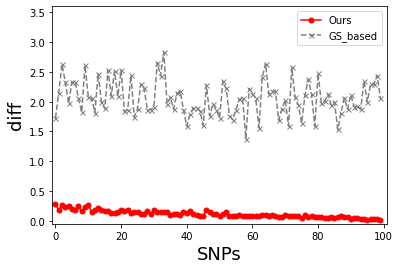

In [11]:
n = 5000; m = 100; epsilon = 4

sum_diff = np.zeros((2,m))

for j in range(50):
    diff = Diff(n,m,epsilon)
    for k in range(m):
        sum_diff[:,k] += diff[:,k]
diff = sum_diff / 50

index = np.zeros(m)
for i in range(m):
    index[i] = i

fig = plt.figure()
plt.ylim(-0.05, 3.60)
plt.xlim(-1, 101)
plt.plot(index, diff[0], marker="o", markersize=5, color = "r", linestyle = "-", label = "Ours")
plt.plot(index, diff[1], marker="x", markersize=5, color = "gray", linestyle = "--", label = "GS_based")
plt.legend()
plt.xlabel("SNPs", fontsize = 18)
plt.ylabel("diff", fontsize = 18)
fig.savefig("diff_22_N=5000_epsilon=4.png")
fig.savefig("figs/diff_22_N=5000_epsilon=4.eps", bbox_inches="tight", pad_inches=0.05)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


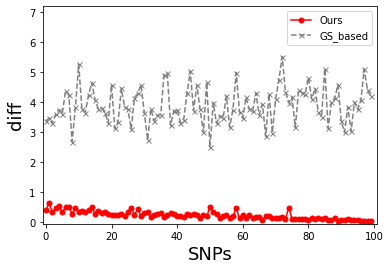

In [12]:
n = 5000; m = 100; epsilon = 2

sum_diff = np.zeros((2,m))

for j in range(50):
    diff = Diff(n,m,epsilon)
    for k in range(m):
        sum_diff[:,k] += diff[:,k]
diff = sum_diff / 50

index = np.zeros(m)
for i in range(m):
    index[i] = i

fig = plt.figure()
plt.ylim(-0.05, 7.20)
plt.xlim(-1, 101)
plt.plot(index, diff[0], marker="o", markersize=5, color = "r", linestyle = "-", label = "Ours")
plt.plot(index, diff[1], marker="x", markersize=5, color = "gray", linestyle = "--", label = "GS_based")
plt.legend()
plt.xlabel("SNPs", fontsize = 18)
plt.ylabel("diff", fontsize = 18)
fig.savefig("diff_22_N=5000_epsilon=2.png")
fig.savefig("figs/diff_22_N=5000_epsilon=2.eps", bbox_inches="tight", pad_inches=0.05)